# TASK 6

### - Purvi Harniya

## Prediction using Decision Tree Algorithm

#### Goal- Create the Decision Tree classifier and visualize it graphically for the given dataset

In this task, we create a decision tree classifier whose purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Data can be found at- https://bit.ly/3kXTdox

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the dataset

In [2]:
#using index_col parameter to make the first column of the dataset as the index column
df=pd.read_csv('Iris.csv',index_col=0)

In [3]:
#having a brief look at the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#determining the number of rows and columns of the dataset
df.shape

(150, 5)

In [5]:
#having a look at the data types, non-null count, and other information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Handling null values

In [6]:
#getting the sum of missing values in each column
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As there are no null values, data cleaning is not required

### Plotting the pair plot

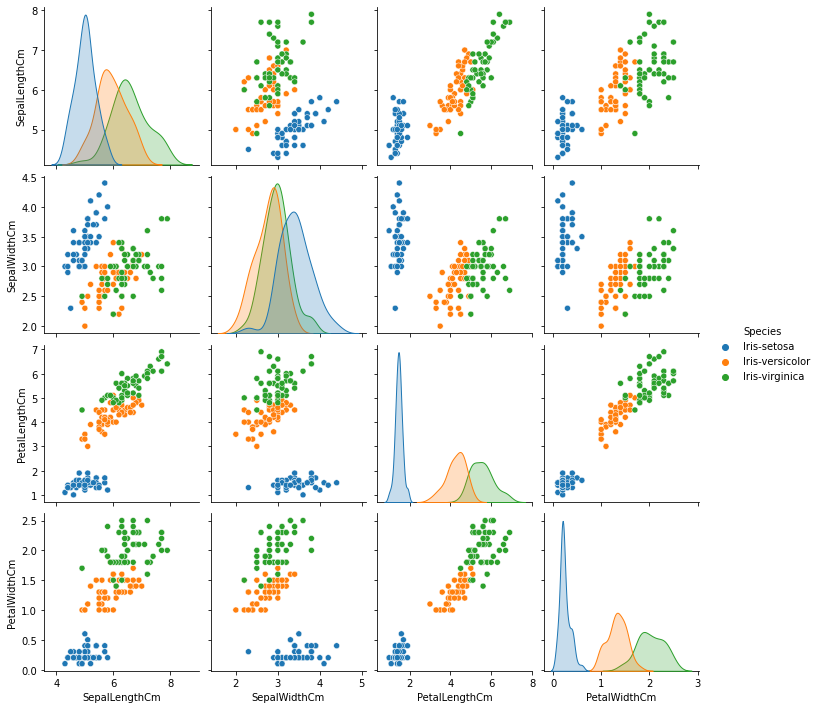

In [7]:
#plotting a pair plot
sns.pairplot(df,hue='Species')

In [8]:
#getting the mathematical description of the dataset (only works on numerical data columns)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Encoding the species column

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

print("Species before encoding:")
print(df ['Species'].value_counts())

df ['Species']= label_encoder.fit_transform(df['Species'])

print("\nSpecies after encoding:")
print(df ['Species'].value_counts())

Species before encoding:
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Species after encoding:
0    50
1    50
2    50
Name: Species, dtype: int64


### Separating features and target variables

In [10]:
featured_cols=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

X=df[featured_cols] #features
y=df['Species']  #target

### Building the training and testing models

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Training the decision tree classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion='gini')
decision_tree = classifier.fit(X_train,y_train)
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predicting the output for test dataset

In [13]:
print("Test input value: \n",X_test.head(3))
y_pred=classifier.predict(X_test)
print("\nPredicted Output: \n ",y_pred[:3])

Test input value: 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
74             6.1           2.8            4.7           1.2
19             5.7           3.8            1.7           0.3
119            7.7           2.6            6.9           2.3

Predicted Output: 
  [1 0 2]


### Accuracy

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Classification Report

Building a text report showing the main classification metrics.

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known

In [18]:
from jupyterthemes import jtplot

x=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['0','1','2'],columns=['0','1','2'])
x

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


### Plotting the confusion matirx

<AxesSubplot:>

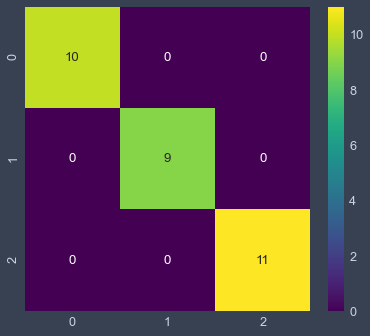

In [19]:
jtplot.style(theme='oceans16')
sns.heatmap(x , cmap='viridis', annot=True, linecolor='r')

### Text representation of decision tree

In [20]:
from sklearn.tree import export_text
r = export_text(decision_tree,feature_names=featured_cols)
print(r)

|--- PetalWidthCm <= 0.80
|   |--- class: 0
|--- PetalWidthCm >  0.80
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: 1
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- class: 2
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: 2



### Vizualising the decision tree with graphviz

[0 1 2]


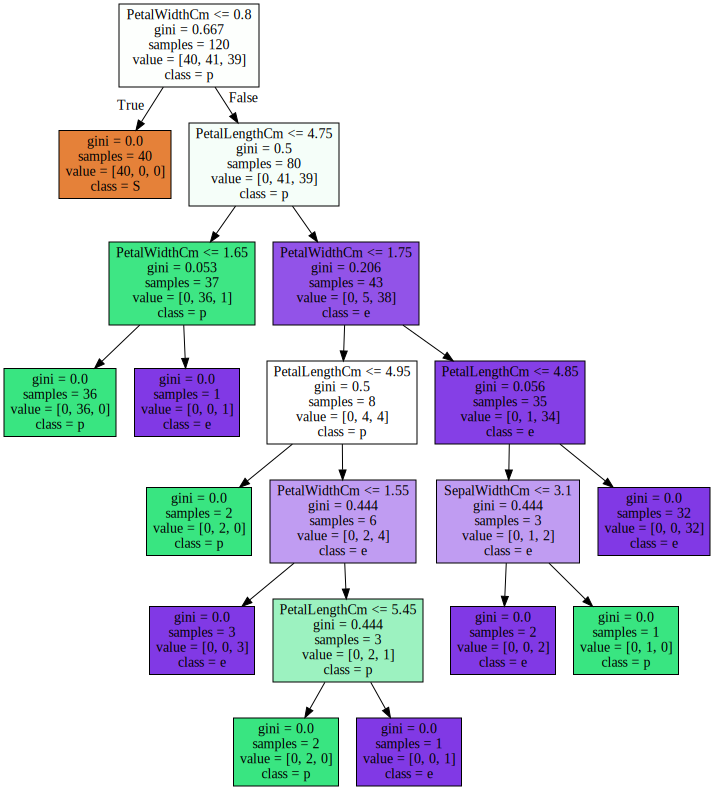

In [21]:
import graphviz
from sklearn import tree

c_names=df['Species'].unique()
print(c_names)

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=featured_cols,  
                                class_names='Species',
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

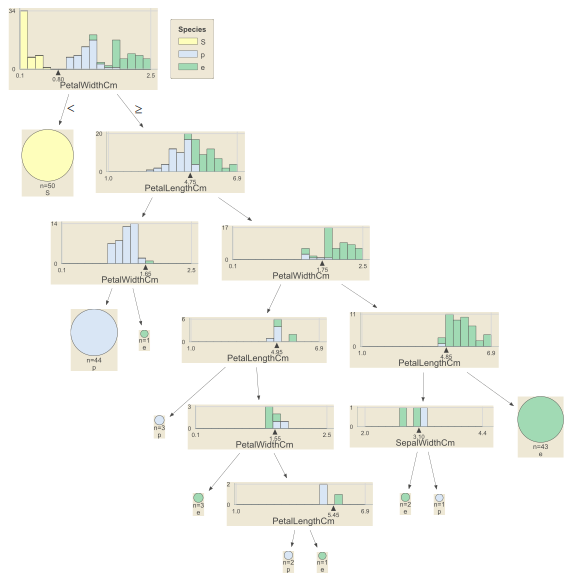

In [22]:
from dtreeviz.trees import dtreeviz 

jtplot.style(theme='solarizedl')
viz = dtreeviz(decision_tree, X, y,
                target_name="Species",
                feature_names=featured_cols,
                class_names='Species')

viz

### Predicting using some random values

In [23]:
#let us take the first three rows of the dataset
pred_data=df.head(3) 
pred_data=pred_data.drop('Species',axis=1) #drop the column species

In [24]:
#predict the result
result=classifier.predict(pred_data)
result

array([0, 0, 0])

In [25]:
#cross checking with the original dataset
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0


##### As we see, the output/prediction of our model matches with the original dataset, hence our model can be used for further predictions

### Thank you